# Scientific Python
- https://numpy.org/doc/stable/reference/index.html#reference

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Introduction

In [4]:
x = np.linspace(0, 4*np.pi, 100_000)
y = np.sin(x)
z = np.cos(x)

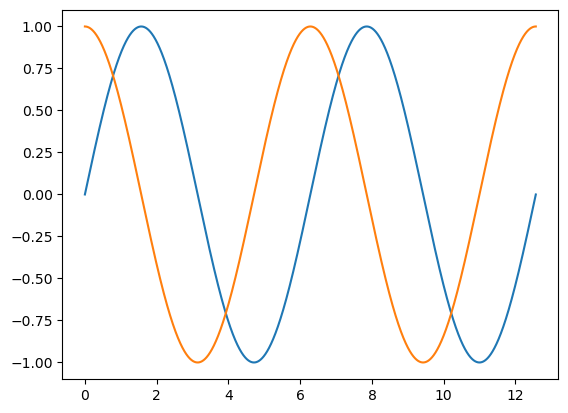

In [5]:
_ = plt.plot(x, y, x, z)

In [6]:
x

array([0.00000000e+00, 1.25664963e-04, 2.51329926e-04, ...,
       1.25661193e+01, 1.25662449e+01, 1.25663706e+01])

In [7]:
x[:10]

array([0.        , 0.00012566, 0.00025133, 0.00037699, 0.00050266,
       0.00062832, 0.00075399, 0.00087965, 0.00100532, 0.00113098])

## N-Dimensional Array

In [9]:
data = np.random.normal(10.0, 2.5, 1_000_000)
len(data), data.mean(), data.std()

(1000000, 10.002269522677754, 2.499253739466287)

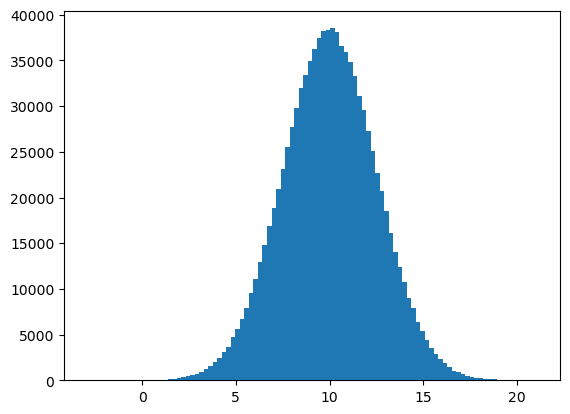

In [10]:
_ = plt.hist(data, bins=100)

### class ndarray and its properties
- shape
- 

In [12]:
for o in x, y, z, data:
    print(type(o))
    print(repr(o))
    print()

<class 'numpy.ndarray'>
array([0.00000000e+00, 1.25664963e-04, 2.51329926e-04, ...,
       1.25661193e+01, 1.25662449e+01, 1.25663706e+01])

<class 'numpy.ndarray'>
array([ 0.00000000e+00,  1.25664962e-04,  2.51329923e-04, ...,
       -2.51329923e-04, -1.25664962e-04, -4.89858720e-16])

<class 'numpy.ndarray'>
array([1.        , 0.99999999, 0.99999997, ..., 0.99999997, 0.99999999,
       1.        ])

<class 'numpy.ndarray'>
array([ 6.94505715, 12.19110442, 10.98626186, ...,  9.61612106,
       15.87959901,  7.12247743])



property ndarray.shape: tuple of length of each dimension

In [14]:
data.shape

(1000000,)

property ndarray.dtype: type of each element
- int8, int16, int32 (i.e. int), int64
- uint8, uint16, uint32, uint64
- float32, float64 (i.e. float)
- bool
- datetime64 (better precision than datetime)

In [16]:
data.dtype

dtype('float64')

In [17]:
m = np.zeros((5,5), dtype='uint8')
m

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

In [18]:
m.shape

(5, 5)

In [19]:
m.dtype

dtype('uint8')

In [20]:
data.mean()

10.002269522677754

In [21]:
data.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [22]:
m.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [23]:
d = m.diagonal()
d

array([0, 0, 0, 0, 0], dtype=uint8)

In [24]:
d.flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : False
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [25]:
m[2,2] = 22
m

array([[ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0, 22,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0]], dtype=uint8)

In [26]:
d

array([ 0,  0, 22,  0,  0], dtype=uint8)

In [27]:
i = 2
assert d[i] == m[i,i]

In [28]:
m[:3, :3]

array([[ 0,  0,  0],
       [ 0,  0,  0],
       [ 0,  0, 22]], dtype=uint8)

In [29]:
data[::100_000]

array([ 6.94505715,  8.84624573,  8.93012883, 10.94749919,  9.820351  ,
       12.74885492,  7.5684659 ,  8.64632822, 14.55210811, 10.86539988])

In [30]:
# matrix multiplication
m @ m

array([[  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0, 228,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0]], dtype=uint8)

In [31]:
# element by element
m * m

array([[  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0, 228,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0]], dtype=uint8)

In [135]:
m3 = np.array(
    [[1, 2, 40],
     [45, 34, 23],
     [7, 54, 22]],
    dtype='uint16'
)
m3

array([[ 1,  2, 40],
       [45, 34, 23],
       [ 7, 54, 22]], dtype=uint16)

In [137]:
print(m3.dtype)
print(m3.shape)

uint16
(3, 3)


In [139]:
# AttributeError: Cannot delete array shape
# del m3.shape

In [141]:
m3.shape = (9,)
m3

array([ 1,  2, 40, 45, 34, 23,  7, 54, 22], dtype=uint16)

In [143]:
## ValueError: cannot reshape array of size 9 into shape (10,10,10)
# m3.shape = (10, 10, 10)

In [145]:
data2 = data.reshape((100, 100, 100))
data2

array([[[ 7.00781328, 12.19110442, 10.98626186, ..., 12.07053308,
         14.52191001,  7.46747424],
        [10.5196387 ,  8.19305355, 10.4315573 , ...,  5.53563136,
          9.8048132 ,  8.6685444 ],
        [ 9.40385977,  9.59070693, 11.38933035, ..., 12.53221811,
          8.26496814,  8.92530183],
        ...,
        [ 7.16401158,  8.50641979,  9.53414708, ...,  7.70696443,
          8.19176975,  7.23733924],
        [11.33390845, 11.86948325, 10.70632628, ...,  9.59962229,
         10.26025394,  9.92899816],
        [12.54163365, 12.68178183,  9.96875668, ...,  8.68589059,
          8.81678404,  7.99287263]],

       [[ 7.26558126, 12.58736162, 12.18054453, ...,  9.54723453,
         11.84064308, 10.03181928],
        [10.81122884,  6.20685806,  7.6870929 , ..., 14.16859739,
          9.4976428 , 12.55496734],
        [ 9.43405368, 11.75221351, 10.62308653, ..., 10.7444612 ,
         10.19082848,  9.0234346 ],
        ...,
        [ 9.17184162,  8.41588919,  7.58228521, ...,  

In [147]:
data2.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [149]:
data[0] *= 1.001
print(data[0])
print(data2[0,0,0])

7.014821088616339
7.014821088616339


In [151]:
m3.shape = (3,3)
m3

array([[ 1,  2, 40],
       [45, 34, 23],
       [ 7, 54, 22]], dtype=uint16)

In [153]:
m3 * m3 # calls __mul__

array([[   1,    4, 1600],
       [2025, 1156,  529],
       [  49, 2916,  484]], dtype=uint16)

In [155]:
m3 @  m3 # calls __matmul__

array([[ 371, 2230,  966],
       [1736, 2488, 3088],
       [2591, 3038, 2006]], dtype=uint16)

In [161]:
## ValueError: operands could not be broadcast together with shapes (3,3) (10,10) 
# m3 * np.zeros((10,10), dtype='uint16')

In [163]:
m3 + 1

array([[ 2,  3, 41],
       [46, 35, 24],
       [ 8, 55, 23]], dtype=uint16)

In [165]:
m3 += 10

In [167]:
m3

array([[11, 12, 50],
       [55, 44, 33],
       [17, 64, 32]], dtype=uint16)

In [171]:
data < 10.0

array([ True, False, False, ...,  True, False,  True])

In [173]:
any(data < 10.0)

True

In [175]:
np.any(data < 10.0)

True

In [177]:
(data < 10.0).any()

True

In [179]:
data[data < 10.0]

array([7.01482109, 7.71042585, 9.57756441, ..., 8.92114074, 9.61612106,
       7.12247743])

In [187]:
extract = data2[data2 < 10.0] # 3D => 1D
extract

array([7.01482109, 7.71042585, 9.57756441, ..., 8.92114074, 9.61612106,
       7.12247743])

In [189]:
extract.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [185]:
np.where(data2 < 10.0)

(array([ 0,  0,  0, ..., 99, 99, 99], dtype=int64),
 array([ 0,  0,  0, ..., 99, 99, 99], dtype=int64),
 array([ 0,  3,  4, ..., 94, 97, 99], dtype=int64))

In [193]:
data3 = data.reshape((1000, 1000))
data3

array([[ 7.01482109, 12.19110442, 10.98626186, ...,  8.17306218,
        13.58385291, 11.64417461],
       [ 9.08222485,  8.70273722, 12.17290907, ..., 11.21887659,
        10.52251268,  8.72665182],
       [12.30987459,  9.25106747,  9.20726775, ..., 10.28493457,
         8.17346798, 10.12586025],
       ...,
       [13.05602854, 13.62189659,  8.16513701, ...,  8.62031238,
        13.90100196, 10.50618657],
       [ 7.12305162, 10.80770742, 13.9644692 , ...,  9.6832839 ,
        11.65478842, 10.08736492],
       [16.5069809 ,  9.48316822, 13.27419845, ...,  9.61612106,
        15.87959901,  7.12247743]])

In [201]:
print(data3.mean())
print(np.mean(data3))

10.002269592441687
10.002269592441687


In [203]:
np.median(data3)

10.002503849551989

In [210]:
np.quantile(data3, 0.95)

14.111019126458478

In [212]:
data3[99, 768] = np.nan

In [216]:
data3.sum(), np.median(data3)

(nan, nan)

In [218]:
np.nansum(data3), np.nanmedian(data3)

(10002260.132269328, 10.002506706900713)

In [220]:
np.nanmedian(data3)

10.002506706900713

In [222]:
np.nanmedian(data3, axis=1) # rows

array([ 9.91471484,  9.81927059, 10.0269461 ,  9.92350331, 10.04066974,
       10.21724457, 10.08226221, 10.08182141,  9.99629309, 10.11065633,
        9.8712426 , 10.12433973, 10.00096322,  9.87229652, 10.06748548,
        9.98530793,  9.99880587,  9.92285331, 10.2097912 , 10.10009757,
       10.09423406, 10.13133282,  9.85415951,  9.84052212,  9.98690641,
       10.02662755,  9.96764489,  9.96358445,  9.91519223,  9.89085032,
        9.93157866,  9.95867264,  9.90091972, 10.2291425 ,  9.95571155,
       10.03166258, 10.08354315, 10.10522966,  9.84112485, 10.16767353,
       10.06610641,  9.88556681,  9.99292809, 10.0317282 , 10.04125048,
        9.96803311, 10.0312155 ,  9.92437816, 10.04729113,  9.91839049,
        9.95731707,  9.81625878,  9.9675054 , 10.12774874,  9.94424979,
        9.89899206,  9.99064383,  9.98485584, 10.06088234,  9.93813937,
        9.83697874,  9.89872701,  9.84367756,  9.96336547,  9.9245982 ,
       10.08931126, 10.26927195, 10.11610535, 10.03662398, 10.08

In [224]:
np.nanmedian(data3, axis=0) # columns

array([10.04273547,  9.95286978, 10.08500429, 10.00656447, 10.11790702,
       10.04365082, 10.04050082, 10.01770344, 10.03003998,  9.88611869,
       10.07063473,  9.75973514,  9.90853131, 10.06452419, 10.08235589,
       10.05062612,  9.78911775, 10.03955092,  9.96402326, 10.01322159,
        9.83699784, 10.23082763,  9.82126234,  9.98944789,  9.96123538,
       10.12726628,  9.96848669, 10.03330911,  9.99493153, 10.02918458,
       10.12080278,  9.86294172, 10.03655477,  9.84594349,  9.97658061,
       10.01763206, 10.11365027,  9.95579776,  9.99570497, 10.10790634,
        9.94448203, 10.02463463, 10.11366712,  9.94800535,  9.8850436 ,
       10.19814682,  9.97105027,  9.9913198 ,  9.8937354 , 10.06476338,
        9.84060653,  9.99494823, 10.05496044, 10.21303278, 10.01847837,
        9.99260247,  9.93040981, 10.03634099, 10.06802909,  9.83940959,
        9.96310062, 10.15151637, 10.01253423,  9.96251776,  9.88594383,
       10.0275003 ,  9.86325927,  9.99880075,  9.91172185,  9.85

In [226]:
m3

array([[11, 12, 50],
       [55, 44, 33],
       [17, 64, 32]], dtype=uint16)

In [228]:
m3.sum(axis=1)

array([ 73, 132, 113], dtype=uint32)

## Pandas DataFrame
- IO: csv, json, excel, xml, SQL, ..., data 2D python (list,tuple, dict)

In [284]:
meteo = pd.read_csv(
    'data/12-station-meteo-toulouse-montaudran.csv',
    encoding='UTF-8',
    parse_dates=['heure_utc'],
    sep=';'
)
meteo

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris,heure_utc
0,1822488f829800000d800000,12,83.0,0.0,0.0,100800.0,0.0,ISS,0.0,0.0,0.0,0.0,12.0,2023-01-02T17:45:00+01:00,2023-01-02 16:45:00+00:00
1,182248af669800000d800000,12,83.0,0.0,0.0,100800.0,0.0,ISS,0.0,0.0,0.0,0.0,11.9,2023-01-02T18:00:00+01:00,2023-01-02 17:00:00+00:00
2,1822496f5e9000000da00000,12,82.0,0.0,0.0,100900.0,0.0,ISS,0.0,0.0,0.0,0.0,11.7,2023-01-02T19:30:00+01:00,2023-01-02 18:30:00+00:00
3,18224a4f52a000000dc00000,12,84.0,0.0,0.0,101000.0,0.0,ISS,0.0,0.0,0.0,0.0,11.4,2023-01-02T21:15:00+01:00,2023-01-02 20:15:00+00:00
4,18224acf46a800000dc00000,12,85.0,0.0,0.0,101000.0,0.0,ISS,0.0,0.0,0.0,0.0,11.1,2023-01-02T22:15:00+01:00,2023-01-02 21:15:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93368,198c524d4ed000000d200000,12,90.0,0.0,0.0,100500.0,0.0,ISS,0.0,0.0,0.0,0.0,3.3,2024-12-12T05:15:00+01:00,2024-12-12 04:15:00+00:00
93369,198c526d4ed000000d200000,12,90.0,0.0,0.0,100500.0,0.0,ISS,0.0,0.0,0.0,0.0,3.3,2024-12-12T05:30:00+01:00,2024-12-12 04:30:00+00:00
93370,198c53cd12d800000d200000,12,91.0,0.0,0.0,100500.0,0.0,ISS,0.0,0.0,0.0,0.0,2.4,2024-12-12T08:15:00+01:00,2024-12-12 07:15:00+00:00
93371,198c552dded000000d200000,12,90.0,0.0,0.0,100500.0,0.0,ISS,0.0,0.0,0.0,0.0,5.7,2024-12-12T11:00:00+01:00,2024-12-12 10:00:00+00:00


In [286]:
meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93373 entries, 0 to 93372
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype              
---  ------                                      --------------  -----              
 0   data                                        93373 non-null  object             
 1   id                                          93373 non-null  int64              
 2   humidite                                    93372 non-null  float64            
 3   direction_du_vecteur_de_vent_max            93372 non-null  float64            
 4   pluie_intensite_max                         93372 non-null  float64            
 5   pression                                    93372 non-null  float64            
 6   direction_du_vecteur_vent_moyen             93372 non-null  float64            
 7   type_de_station                             93372 non-null  object             
 8   pluie                               

In [292]:
meteo.loc[0, 'heure_utc']

Timestamp('2023-01-02 16:45:00+0000', tz='UTC')

In [294]:
meteo.describe()

,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature
count,93373.000000,93372.000000,93372.000000,93372.0,93372.000000,93372.000000,93372.0,93372.000000,93372.000000,93372.000000,93372.000000
mean,11.999871,74.133338,4.596656,0.0,99754.898685,27.686823,0.0,103.424769,1.600823,5.246080,15.394168
std,0.039271,16.547534,5.828169,0.0,1348.682912,54.468975,0.0,131.133807,3.066484,7.983885,9.180557
min,0.000000,0.000000,0.000000,0.0,90000.000000,0.000000,0.0,0.000000,0.000000,0.000000,-50.000000
25%,12.000000,65.000000,0.000000,0.0,99500.000000,0.000000,0.0,0.000000,0.000000,0.000000,10.200000
50%,12.000000,79.000000,0.000000,0.0,99900.000000,0.000000,0.0,0.000000,0.000000,0.000000,15.200000
75%,12.000000,87.000000,9.000000,0.0,100300.000000,0.000000,0.0,202.500000,2.000000,8.000000,21.000000
max,12.000000,97.000000,15.000000,0.0,102200.000000,180.000000,0.0,337.500000,27.000000,59.000000,42.300000


In [296]:
meteo.columns

Index(['data', 'id', 'humidite', 'direction_du_vecteur_de_vent_max',
       'pluie_intensite_max', 'pression', 'direction_du_vecteur_vent_moyen',
       'type_de_station', 'pluie',
       'direction_du_vecteur_de_rafale_de_vent_max',
       'force_moyenne_du_vecteur_vent', 'force_rafale_max', 'temperature',
       'heure_de_paris', 'heure_utc'],
      dtype='object')

In [298]:
# dynamic attribute for each column
meteo.temperature

0        12.0
1        11.9
2        11.7
3        11.4
4        11.1
         ... 
93368     3.3
93369     3.3
93370     2.4
93371     5.7
93372     4.1
Name: temperature, Length: 93373, dtype: float64

In [300]:
meteo['temperature']

0        12.0
1        11.9
2        11.7
3        11.4
4        11.1
         ... 
93368     3.3
93369     3.3
93370     2.4
93371     5.7
93372     4.1
Name: temperature, Length: 93373, dtype: float64

In [302]:
meteo.loc[
    meteo.temperature < -48, 
    ['temperature', 'heure_utc']
].sort_values('heure_utc')

,temperature,heure_utc
25562,-50.0,2019-06-26 00:00:00+00:00
14725,-50.0,2019-06-26 00:15:00+00:00
14724,-50.0,2019-06-26 00:30:00+00:00
23695,-50.0,2019-06-26 00:45:00+00:00
25561,-50.0,2019-06-26 01:00:00+00:00
...,...,...
90292,-50.0,2024-10-27 01:00:00+00:00
90732,-50.0,2024-11-23 04:00:00+00:00
90731,-50.0,2024-11-23 04:15:00+00:00
90734,-50.0,2024-11-23 04:30:00+00:00


In [308]:
meteo_temperature = meteo.loc[
    meteo.temperature > -48, 
    ['temperature', 'heure_utc']
].sort_values('heure_utc')
meteo_temperature.head(3)

,temperature,heure_utc
3496,35.8,2019-06-26 13:30:00+00:00
25550,35.8,2019-06-26 13:45:00+00:00
23681,35.7,2019-06-26 14:00:00+00:00


In [322]:
stats = meteo_temperature \
    .set_index('heure_utc') \
    .groupby(pd.Grouper(freq='MS')) \
    .agg(['min', 'max', 'mean'])
stats

temperature                 
                                  min   max       mean
heure_utc                                             
2019-06-01 00:00:00+00:00        19.2  39.4  28.718779
2019-07-01 00:00:00+00:00        14.1  38.3  25.008367
2019-08-01 00:00:00+00:00        13.1  35.9  23.703595
2019-09-01 00:00:00+00:00         9.1  32.1  20.342917
2019-10-01 00:00:00+00:00         7.5  27.8  16.392616
...                               ...   ...        ...
2024-08-01 00:00:00+00:00        12.9  36.6  24.481400
2024-09-01 00:00:00+00:00         5.3  31.1  17.838609
2024-10-01 00:00:00+00:00         5.7  25.4  16.428156
2024-11-01 00:00:00+00:00         1.0  22.5  11.972455
2024-12-01 00:00:00+00:00         1.5  17.3   8.216370

[67 rows x 3 columns]

<Axes: xlabel='heure_utc'>

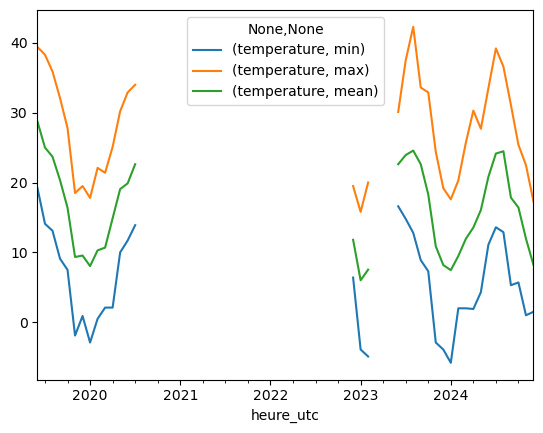

In [324]:
stats.plot()